Homework 8 (20 marks)

Create a copy of the notebook to start answering the questions. Name your notebook in the format HW8_lastname_firstname.ipynb to facilitate the grading process.
Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.
NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.
The due date of this homework is 05/02/2021 (Sunday).
Please ensure you follow all the steps mentioned in the homework.
You can submit your solutions any number of times until the deadline.
 
The format of this homework is slightly different from the other homeworks till now. Make sure you read every instruction correctly.

### Handwritten Digit Recognition 

For this project, we will be using the popular MNIST database. It is a collection of 70000 handwritten digits split into training and test set of 60000 and 10000 images respectively.

PyTorch provides an easy implementation to download the cleaned and already prepared data.

Please do not copy code from outside for the assignment. We recommend that you try the code on your own and understand the implementation. We will provide the necessary steps to be followed. It is a fairly simple assignment with less to code and more to understand:)

Everything you need will be provided in the assignment.

In [1]:
# libraries needed
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter


We will perform some transformations on our data before feeding it into the neural network pipeline. Since the input data consists of images, we will do some pre-processing to convert all the images to a format that can be understood by the neural network. We do it using torchvision.transforms.

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

- transforms.ToTensor() — converts the image into numbers, that are understandable by the network. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.
- transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

The above code ensures that all our images have the same dimensions.

Now will download the data sets, shuffle them and transform each of them. We download the data sets and load them to DataLoader, which combines the data-set and a sampler and provides single- or multi-process iterators over the data-set.

Please enter the path to store your train and test data correctly in place of the 'PATH_TO_STORE_TRAINSET' and 'PATH_TO_STORE_TESTSET' respectively. 

This can either be the colab runtime in which case the path would be /content/. If not you can also store it to a location on drive.

In [3]:
# give full path below
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSE', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# here batch size is the number of images we want to read in one go

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSE/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSE/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSE/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSE/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSE/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSE/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSE/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSE/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Processing...
Done!


Next, we will do some exploratory data analysis on our images and tensors. Let us check out the shape of the images and the labels.

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


The shape of images as you’ll find out is, torch.Size([64,1,28,28]), which suggests that there are 64 images in each batch and each image has a dimension of 28 x 28 pixels.

Similarly, the labels have a shape as torch.Size([64]). This is because the 64 images should have 64 labels respectively. That’s it.

Now let us view one image from the training set.

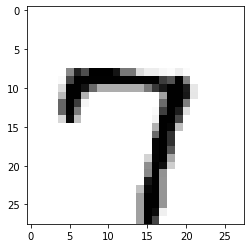

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

Next, let us view a bunch of images

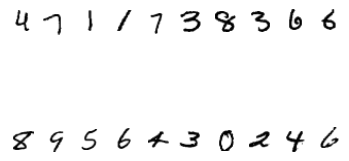

In [6]:
figure = plt.figure()
num_of_images = 20
for index in range(1, num_of_images + 1):
    plt.subplot(2, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

This will generate a grid of images in a random order. 

Now, let us define our neural network.

We will be building the following network. This network contains an input layer (the first layer), an output layer of ten neurons (or units, the circles) and two hidden layers in between.

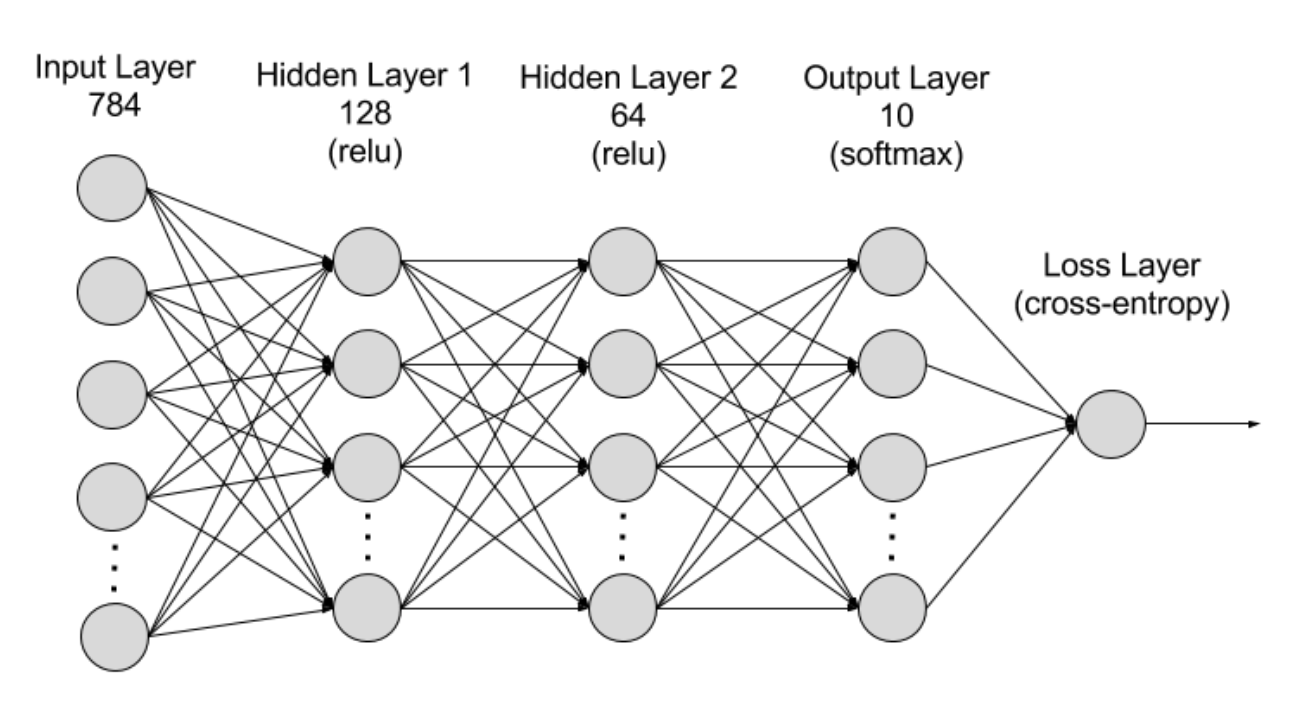

Build the above model in PyTorch.

Use nn.Sequential to start. There are three linear layers with ReLU activation ( a simple function which allows positive values to pass through, whereas negative values are modified to zero). The output layer is a linear layer with LogSoftmax activation because this is a classification problem.

We have 784 units in the first layer. It is because we flatten out each image before sending it inside the neural network. (28 x 28 = 784)

The first hidden layer size is 128. This is followed by a ReLU activation. This is passed through another hidden layer of size 64, which is followed by a ReLU activation. You have another linear layer with an output of size 10. This layer is followed by the LogSoftMax activation. (Google LogSoftMax for usage, dim should be set to 1.)

Complete the TODO part of the code below.

In [7]:
from torch import nn

model = torch.nn.Sequential(torch.nn.Linear(784, 128),
                      torch.nn.ReLU(),
                      torch.nn.Linear(128, 64),
                      torch.nn.ReLU(),
                      torch.nn.Linear(64, 10),
                      torch.nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Next, we will define the negative log-likelihood loss. It is useful to train a classification problem with C classes. Together the LogSoftmax() and NLLLoss() acts as the cross-entropy loss as shown in the network architecture diagram above. Complete only the TODO parts.

In [10]:
# Insert code wherever asked. Do not alter any other part of the code.

# assign criterion to negative log-likelihood loss (check the pytorch documentation for usage)

criterion = torch.nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

Now to train the network, the neural network iterates over the training set and updates the weights. We make use of torch.optim which is a module provided by PyTorch to optimize the model, perform gradient descent and update the weights by back-propagation. Thus in each epoch (number of times we iterate over the training set), we will be seeing a gradual decrease in training loss.

Complete the below code only in the TODO parts of the code in order to setup the training loop. Do not modify anything else in the code.

The below code may take a while to run as the data is large.

You will also be adding code to generate the tensorboard logs.

In [11]:
writer = SummaryWriter()

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum = 0.5 )

time0 = time()
epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)

        loss = criterion(output, labels)
        print(e, loss.item())

        writer.add_scalar("Loss/train", loss, epochs)

        loss.backward()

        optimizer.step()
  
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\n Running loss:", running_loss)
print("\nTraining Time (in minutes) =",(time()-time0)/60)
print(writer)

Streaming output truncated to the last 5000 lines.
9 0.3052651584148407
9 0.373753160238266
9 0.3175711929798126
9 0.40208572149276733
9 0.32506605982780457
9 0.3802318274974823
9 0.27571040391921997
9 0.387687623500824
9 0.22995653748512268
9 0.3118777871131897
9 0.35731378197669983
9 0.29283273220062256
9 0.23482094705104828
9 0.3433801233768463
9 0.2258678674697876
9 0.3262970447540283
9 0.23902489244937897
9 0.38113856315612793
9 0.2896961271762848
9 0.3092353045940399
9 0.2966136932373047
9 0.42218708992004395
9 0.31583669781684875
9 0.34133419394493103
9 0.2701861560344696
9 0.4074479043483734
9 0.3651633858680725
9 0.4098323583602905
9 0.418304979801178
9 0.3599885404109955
9 0.2843154966831207
9 0.2550363838672638
9 0.3156452775001526
9 0.43787503242492676
9 0.28135445713996887
9 0.2989330589771271
9 0.41840842366218567
9 0.2536424696445465
9 0.3657418489456177
9 0.37148287892341614
9 0.37609970569610596
9 0.26484715938568115
9 0.2051064521074295
9 0.367756187915802
9 0.4299865

Run the cells below to show the image and class probabilities that were predicted

In [17]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


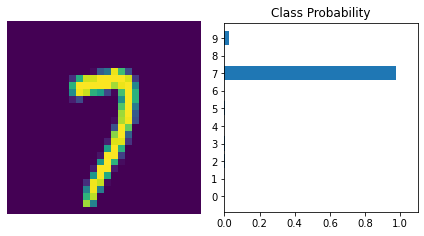

In [19]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Now we iterate through the validation set using a for loop and calculate the total number of correct predictions and then calculate the model accuracy.

In [20]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9196


Now that we have learnt how to work with image data and we have a baseline for our neural network, we want you to try to achieve a good accuracy by training a model for different hyperparameters. Use the same code as above for your experiment. You are free to experiment with different values for the learning rate, use different optimizer instead of SGD, use different loss function, add extra layers to your network, etc. Try out your experiments and keep the final set of hyperparameters. Display the accuracy for your custom model. If interested you can also try adding dropout layers to your model to see if model performs better.

In [ ]:
# TODO: Add your code here (5 marks)